## Module 1 - Autograded

### Outline:
**Here are the objectives of this assignment:**

1. Define and interpret the ANCOVA model with interaction terms.
2. Conduct basic hypothesis tests (full F-test, individual t-tests) to check whether there are statistically significant differences with respect to the mean of a continuous variable across groups.
3. Show that the one-way ANOVA (and ANCOVA) model(s) can be written as a linear regression model.
4. Define the one-way (single-factor) ANOVA model, and write the model in two different but equivalent ways: as a means model and effects model.
5. To apply your understanding of these models to a real-world datasets

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Run this cell to import the required packages for this assignment:
library(testthat)
library(tidyverse)
# remotes::install_github("allisonhorst/palmerpenguins")
# citation("palmerpenguins")
# library(palmerpenguins)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



### Problem #1: Introduction to ANCOVA (20 points)

First, we import the ```sightsing``` dataset for you.

It contains two treatment groups. The main part of this question you are asked to fill in a function, ```my_ancova_model``` that returns the linear ANCOVA model from this dataset.

In [2]:
### Read in the data and display means for each group.
sing = read.table('sightsing.dat', sep = ',')
names(sing) = c("treat", "test1", "test2")
sing = sing %>%
    mutate(treat = as.factor(treat))
print(head(sing,nrow(sing)))
sing %>%
    group_by(treat) %>%
    summarise(n_pre = n(), mean_test1 = mean(test1), n_post = n(), mean_test2 = mean(test2)) 

   treat test1 test2
1      1   0.0   8.5
2      1   0.0   0.0
3      1   0.0   4.3
4      1   2.5   0.0
5      1   0.0  25.6
6      1  10.7   0.0
7      1  46.9  63.9
8      1   0.0   0.0
9      1   6.4   4.3
10     1  27.7  23.4
11     1  21.3  36.2
12     1   0.0   0.0
13     1   0.0   4.3
14     1   0.0  17.0
15     1   6.4   0.0
16     1  12.8   2.1
17     1   0.0  25.6
18     1   8.5   8.5
19     1   8.5   4.3
20     1   2.5  10.7
21     2   0.0  25.6
22     2   0.0  55.4
23     2   0.0   8.5
24     2   0.0   0.0
25     2   8.5  42.6
26     2   8.5  25.6
27     2   0.0  29.3
28     2   0.0   0.0
29     2   2.1  14.8
30     2   0.0   8.5
31     2   0.0  14.9
32     2  19.2  23.4
33     2   8.5  34.1
34     2   4.3  29.8
35     2   0.0   4.3
36     2   8.5   4.3
37     2   8.5  25.6
38     2  21.3  31.0
39     2   2.5  25.6
40     2  72.4  42.6


treat,n_pre,mean_test1,n_post,mean_test2
<fct>,<int>,<dbl>,<int>,<dbl>
1,20,7.710,20,11.935
2,20,8.215,20,22.295


#### 1. (a) Plot this data 

Plot the ```sing``` data with ```test1``` on the x-axis and ```test2``` on the y-axis, with an attribute like color for the ```treat``` variable. This ggplot object will be stored in a variable denoted ```p```. If you need a refresher on ggplot, check this link: https://ggplot2.tidyverse.org/

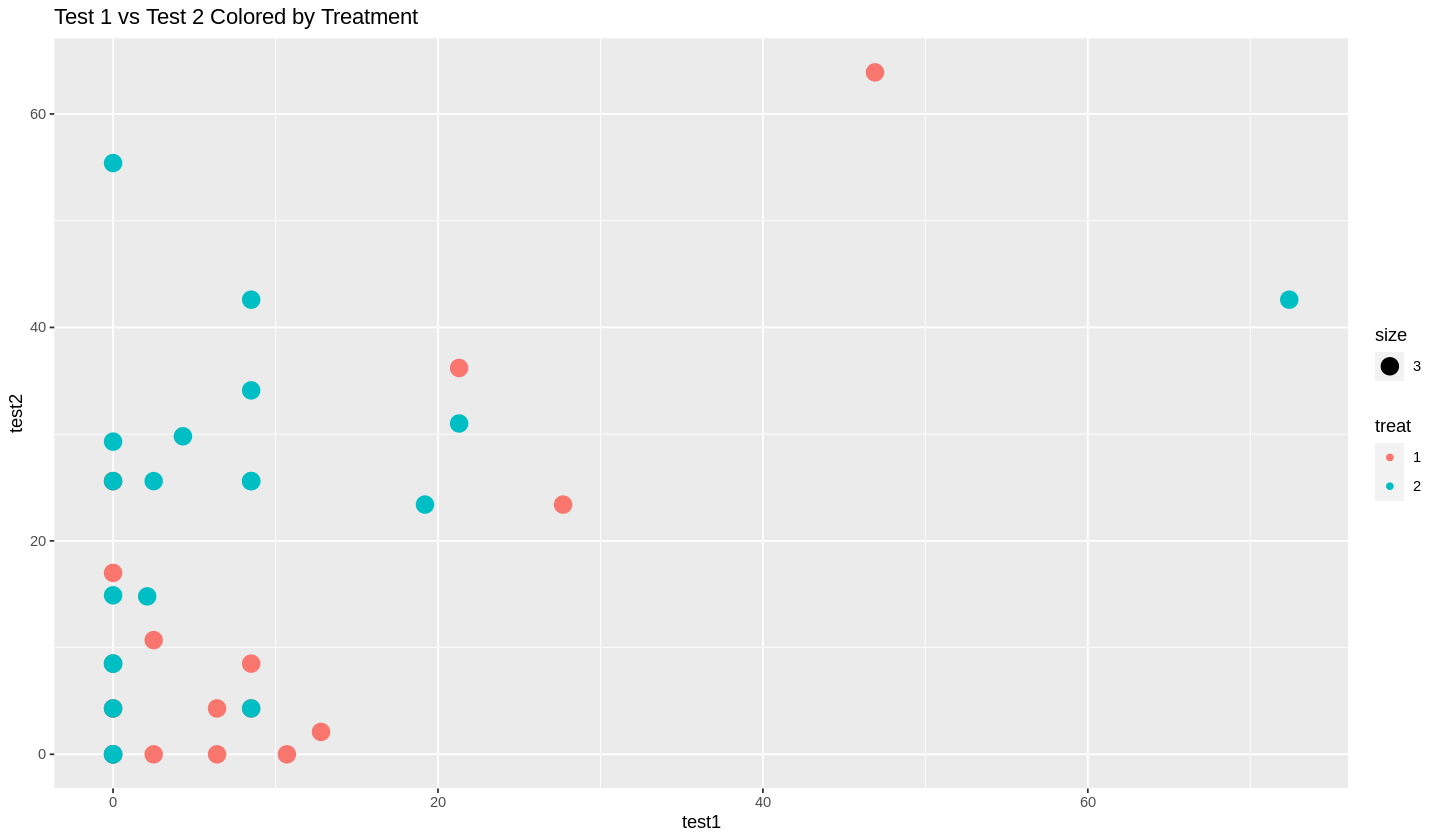

In [40]:
options(repr.plot.width = 12, repr.plot.height = 7)
p = NULL
# your code here
p = ggplot(sing, aes(x=test1, y=test2, color=treat, size=3)) + geom_point() +
labs(title="Test 1 vs Test 2 Colored by Treatment")

print(p)

In [41]:
# Test Cell
# Note: There may be hidden tests for each question!
# Make sure you are confident in your solutions.

#### 1. (b) Fill in the following function, which takes the dataset as an argument and returns the linear model object:

This model should be of the following structure:

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \varepsilon_i$$

Where:
- $Y_i$ is ```test2```
- $X_i$ is ```test1```
- $Z$ is an indicator for the ```treat``` group
- $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$

(tip: be sure to include a ```return``` statement)

(note: the order you input the variables into your lm() function will impact grading. Use the same order as the equation above)

In [42]:
my_ancova_model <- function(mydataset){
    # your code here
    model <- lm(test2 ~ test1 + treat, data = mydataset)
    return(model)   
}

my_ancova_model(sing)


Call:
lm(formula = test2 ~ test1 + treat, data = mydataset)

Coefficients:
(Intercept)        test1       treat2  
     7.3766       0.5912      10.0614  


In [43]:
# Test Cell
if(class(my_ancova_model(sing)) == 'lm'){
    expect_is(my_ancova_model(sing), "lm")
    print('Checking linear model object: ... Correct')
    print('Tip: Make sure that your linear model object has the correct variables!')
}else{
    print('Checking linear model object: ... Incorrect')
    print('Tip: check out the lm() function!')
}

# This cell has hidden test cases that will run after submission.

[1] "Checking linear model object: ... Correct"
[1] "Tip: Make sure that your linear model object has the correct variables!"


#### 1. (c) Fill in the following function which takes a linear model as an argument and returns the p-values column from the ```anova``` table:

In [44]:
my_ancova_table <- function(myancovamodel){
    # your code here
    anova_table <- anova(myancovamodel)
    p_values <- anova_table[, "Pr(>F)"]
    return(p_values)
}

my_ancova_table(my_ancova_model(sing))

[1] 0.0003518965 0.0234698269           NA

In [45]:
# Test Cell
if(test_that('Checking p-values type',{expect_is(my_ancova_table(my_ancova_model(sing)),'numeric')})){
    print('Checking p-values type: Correct')
}
# This cell has hidden test cases that will run after submission.

[1] "Checking p-values type: Correct"


###  Problem #2. Penguins dataset analysis (15 points)

First, we import the ```penguins``` dataset and plot it for you. More info on this dataset can be found here:

  Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism
  and Environmental Variability within a Community of Antarctic
  Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081.
  https://doi.org/10.1371/journal.pone.0090081
  
  https://github.com/allisonhorst/palmerpenguins

In this question, we will explore linear ANCOVA models and potential interactions.

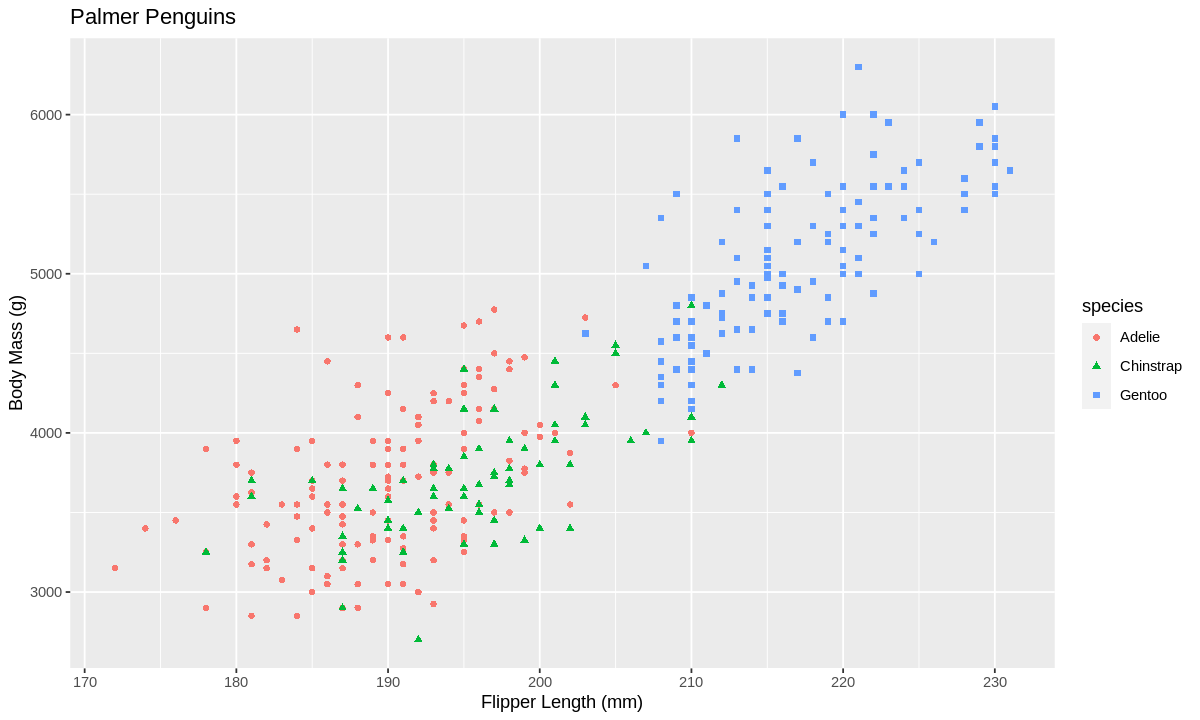

In [61]:
penguins <- read.table('penguins.csv', sep = ',')
penguins <- penguins %>% drop_na()
options(repr.plot.width=10, repr.plot.height=6)
p = ggplot(data = penguins) + 
        geom_point(aes(x = flipper_length_mm, y = body_mass_g,shape = species,color=species)) +
        xlab('Flipper Length (mm)') + ylab('Body Mass (g)') +
        ggtitle('Palmer Penguins')
p

#### 2. (a) Create two models regressing body mass on flipper length and including species (as a factor):

- one model in a variable ```penguins_no_interaction``` without interaction between flipper length and species
    - (hint: of the form $Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \varepsilon_i$)
- one model in a variable ```penguins_with_interaction``` with interaction between flipper length and species
    - (hint: of the form $Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$)

(tip: use ```head(penguins)``` to take a look at the dataset and remember to input your variables in the same order as the models above)

In [65]:
penguins_no_interaction = NULL
penguins_with_interaction = NULL

# your code here
head(penguins)
penguins_no_interaction <- lm(body_mass_g ~ flipper_length_mm + species, data = penguins)
penguins_with_interaction <- lm(body_mass_g ~ flipper_length_mm + species + + species:flipper_length_mm, data = penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male
6,Adelie,Torgersen,38.9,17.8,181,3625,female


In [66]:
# Test Cell
if(test_that('Checking no_interaction linear model object TYPE:',{expect_is(penguins_no_interaction,'lm')})){
    print('Checking no_interaction linear model object TYPE: ... Correct')
}
# This cell has hidden test cases that will run after submission.

[1] "Checking no_interaction linear model object TYPE: ... Correct"


In [67]:
# Test Cell
if(test_that('Checking with_interaction linear model object TYPE',{expect_is(penguins_with_interaction,'lm')})){
    print('Checking with_interaction linear model object TYPE: ... Correct')
}
# This cell has hidden test cases that will run after submission.

[1] "Checking with_interaction linear model object TYPE: ... Correct"


#### 2. (b) Fill in the following function to compute the Mean Square Error (MSE) from a linear model object:


In [72]:
extract_mse <- function(linear_model){
    # your code here
    mean(linear_model$residuals^2)
    
}

extract_mse(lm(body_mass_g ~ flipper_length_mm, data = penguins))

[1] 153789.7

In [73]:
# Test Cell
if(test_that('Checking mse_type',{expect_is(extract_mse(lm(body_mass_g ~ flipper_length_mm, data = penguins)),'numeric')})){
    print('Checking mse_type: ... Correct')
}

# This cell has hidden test cases that will run after submission.

[1] "Checking mse_type: ... Correct"
